In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from pprint import pprint
import time

# Import API key
from config import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
cities

['constitucion',
 'butaritari',
 'mataura',
 'vila velha',
 'riyadh',
 'east london',
 'seoul',
 'ribeira grande',
 'tsihombe',
 'cape town',
 'sheridan',
 'new iberia',
 'moorhead',
 'avarua',
 'paka',
 'talaya',
 'vaini',
 'punta arenas',
 'bluff',
 'milkovo',
 'olenino',
 'puerto ayora',
 'nabire',
 'rikitea',
 'saint-philippe',
 'hermanus',
 'illoqqortoormiut',
 'srednekolymsk',
 'coruripe',
 'sakakah',
 'port alfred',
 'khonsa',
 'shitanjing',
 'marsa matruh',
 'khatanga',
 'palmer',
 'margate',
 'marzuq',
 'omboue',
 'jiuquan',
 'rio gallegos',
 'cidreira',
 'albany',
 'busselton',
 'vaitupu',
 'port hedland',
 'faya',
 'hithadhoo',
 'anadyr',
 'kavieng',
 'barentsburg',
 'yellowknife',
 'nkhotakota',
 'owando',
 'labuhan',
 'banmo',
 'bethel',
 'oranjemund',
 'dolores',
 'roald',
 'qaanaaq',
 'neryungri',
 'namibe',
 'naivasha',
 'norman wells',
 'lorengau',
 'saskylakh',
 'new norfolk',
 'ushuaia',
 'esperance',
 'pampierstad',
 'masjed-e soleyman',
 'kapaa',
 'umzimvubu',
 'va

In [4]:
#seting the list for the data API
x = 1
claudiness =[]
humidity = []
lat = []
temp = []
wind = []

#seting up the loop for the list 
print("hi")
for item in cities:
    try: 
        base_url_weather = "http://api.openweathermap.org/data/2.5/weather?q={0}&appid={1}".format(item,api_keys)
        response = requests.get(base_url_weather).json()
        print("city number" + str(x))
        time.sleep(.75)

        clouds = response['clouds']["all"]
        claudiness.append(clouds)
        humidit = response['main']['humidity']
        humidity.append(humidit)
        latt = response['coord']['lat']
        lat.append(latt)
        tempp = response['main']['temp']
        temp.append(tempp)
        windd = response['wind']['speed']
        wind.append(windd)

        x = x+1
    except Exception:
        print("Failed")
        time.sleep(.75)

    

hi
city number1
city number2
city number3
city number4
city number5
city number6
city number7
city number8
city number9
Failed
city number9
city number10
city number11
city number12
city number13
city number14
city number15
city number16
city number17
city number18
city number19
city number20
city number21
city number22
city number23
city number24
city number25
city number26
Failed
city number26
city number27
city number28
Failed
city number28
city number29
city number30
city number31
city number32
city number33
city number34
city number35
city number36
city number37
city number38
city number39
city number40
city number41
city number42
Failed
city number42
city number43
city number44
city number45
city number46
city number47
Failed
city number47
city number48
city number49
city number50
city number51
Failed
city number51
city number52
city number53
city number54
city number55
city number56
city number57
city number58
city number59
city number60
city number61
city number62
city number63

city number473
city number474
city number475
city number476
city number477
city number478
city number479
city number480
Failed
city number480
Failed
city number480
city number481
city number482
city number483
city number484
city number485
city number486
Failed
city number486
city number487
city number488
city number489
city number490
city number491
city number492
city number493
city number494
city number495
city number496
city number497
city number498
city number499
city number500
Failed
city number500
city number501
city number502
Failed
city number502
city number503
city number504
city number505
city number506
city number507
city number508
city number509
city number510
city number511
city number512
city number513
city number514
city number515
city number516
city number517
Failed
city number517
city number518
city number519
city number520
city number521
city number522
city number523
city number524
city number525
Failed
city number525
city number526
Failed
city number526
Failed
city nu

In [5]:
weather = pd.DataFrame({"claudiness":claudiness,
                        "humidit":humidity,
                        "latt":lat,
                        "tempp":temp,
                        "windd":wind}
                      )
weather.to_csv("weather2.csv")
print(weather)                       
                    

     claudiness  humidit   latt   tempp  windd
0            99       65  23.99  288.73   1.66
1            21       68   3.07  302.62   4.61
2            90       69 -46.19  284.26   6.26
3            20       83  -3.71  299.21   2.10
4             0       37  24.63  294.15   6.06
5            67       82 -33.02  286.15   3.10
6           100       52  37.57  292.75   3.10
7            81       89  38.52  291.43   3.98
8            75       81 -33.93  285.60   3.10
9             1       34  39.65  283.48   9.80
10            1      100  30.00  285.94   1.92
11           75       56  46.87  276.87   4.10
12           41       78 -21.21  299.15   3.10
13           60       97   4.15  294.18   0.55
14           40       86  55.79  271.57   7.00
15           75       88  15.34  297.85   4.10
16           75       70 -53.16  280.67   5.10
17            0       32 -23.58  301.00   9.13
18           20       93  41.53  285.36   2.60
19           97       81  56.21  283.46   5.05
20           

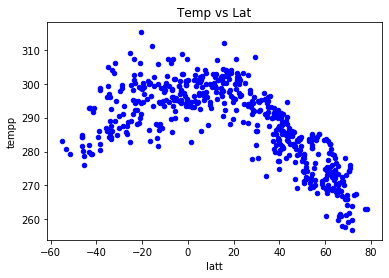

In [6]:
weather.plot.scatter(x="latt",
                     y= "tempp",
                     c = "blue")
plt.title("Temp vs Lat")
plt.savefig("Temp_vs_Lat.png")
plt.show()


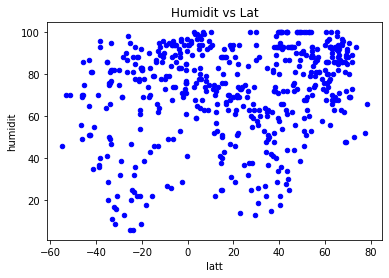

In [7]:
weather.plot.scatter(x="latt",
                     y= "humidit",
                     c = "blue")
plt.title("Humidit vs Lat")
plt.savefig("Humidit_vs_Lat.png")
plt.show()



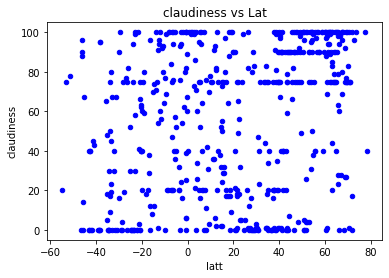

In [8]:
weather.plot.scatter(x="latt",
                     y= "claudiness",
                     c = "blue")
plt.title("claudiness vs Lat")
plt.savefig("claudiness_vs_Lat.png")
plt.show()

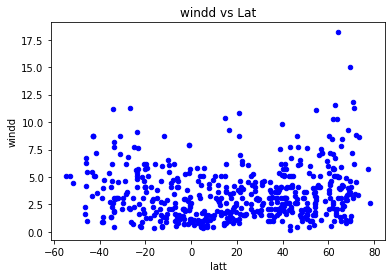

In [9]:
weather.plot.scatter(x="latt",
                     y= "windd",
                     c = "blue")
plt.title("windd vs Lat")
plt.savefig("windd_vs_Lat.png")
plt.show()